In [155]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [156]:
#Importing and viewing data
df = pd.read_csv('Dataset\AB_NYC_2019.csv')
print(df.shape)
df.head(20)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [157]:
columns = df.columns
print(columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [158]:
#Clean NaN values.
df_null_reviews = df[df['reviews_per_month'].isnull()]
df_null_last = df[df['last_review'].isnull()]
df_0_reviews = df[df['reviews_per_month'] == 0]
print(df_null_reviews.shape)
print(df_null_last.shape)
print(df_0_reviews.shape)

(10052, 16)
(10052, 16)
(0, 16)


In [159]:
#The above shows us that 0 reviews in the last month and 0 reviews are equivalent.
#So we replace all nan values with 0 for the purposes of Seaborn pairplot
df = df.fillna(0)

In [160]:
#Next we convert all useful categorical data to numerical through label encoding.
used_columns = ['neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

le = preprocessing.LabelEncoder()

for col in used_columns:
    if df[col].dtypes == 'object':
        le.fit(df[col])
        df[[col]] = le.transform(df[col])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0


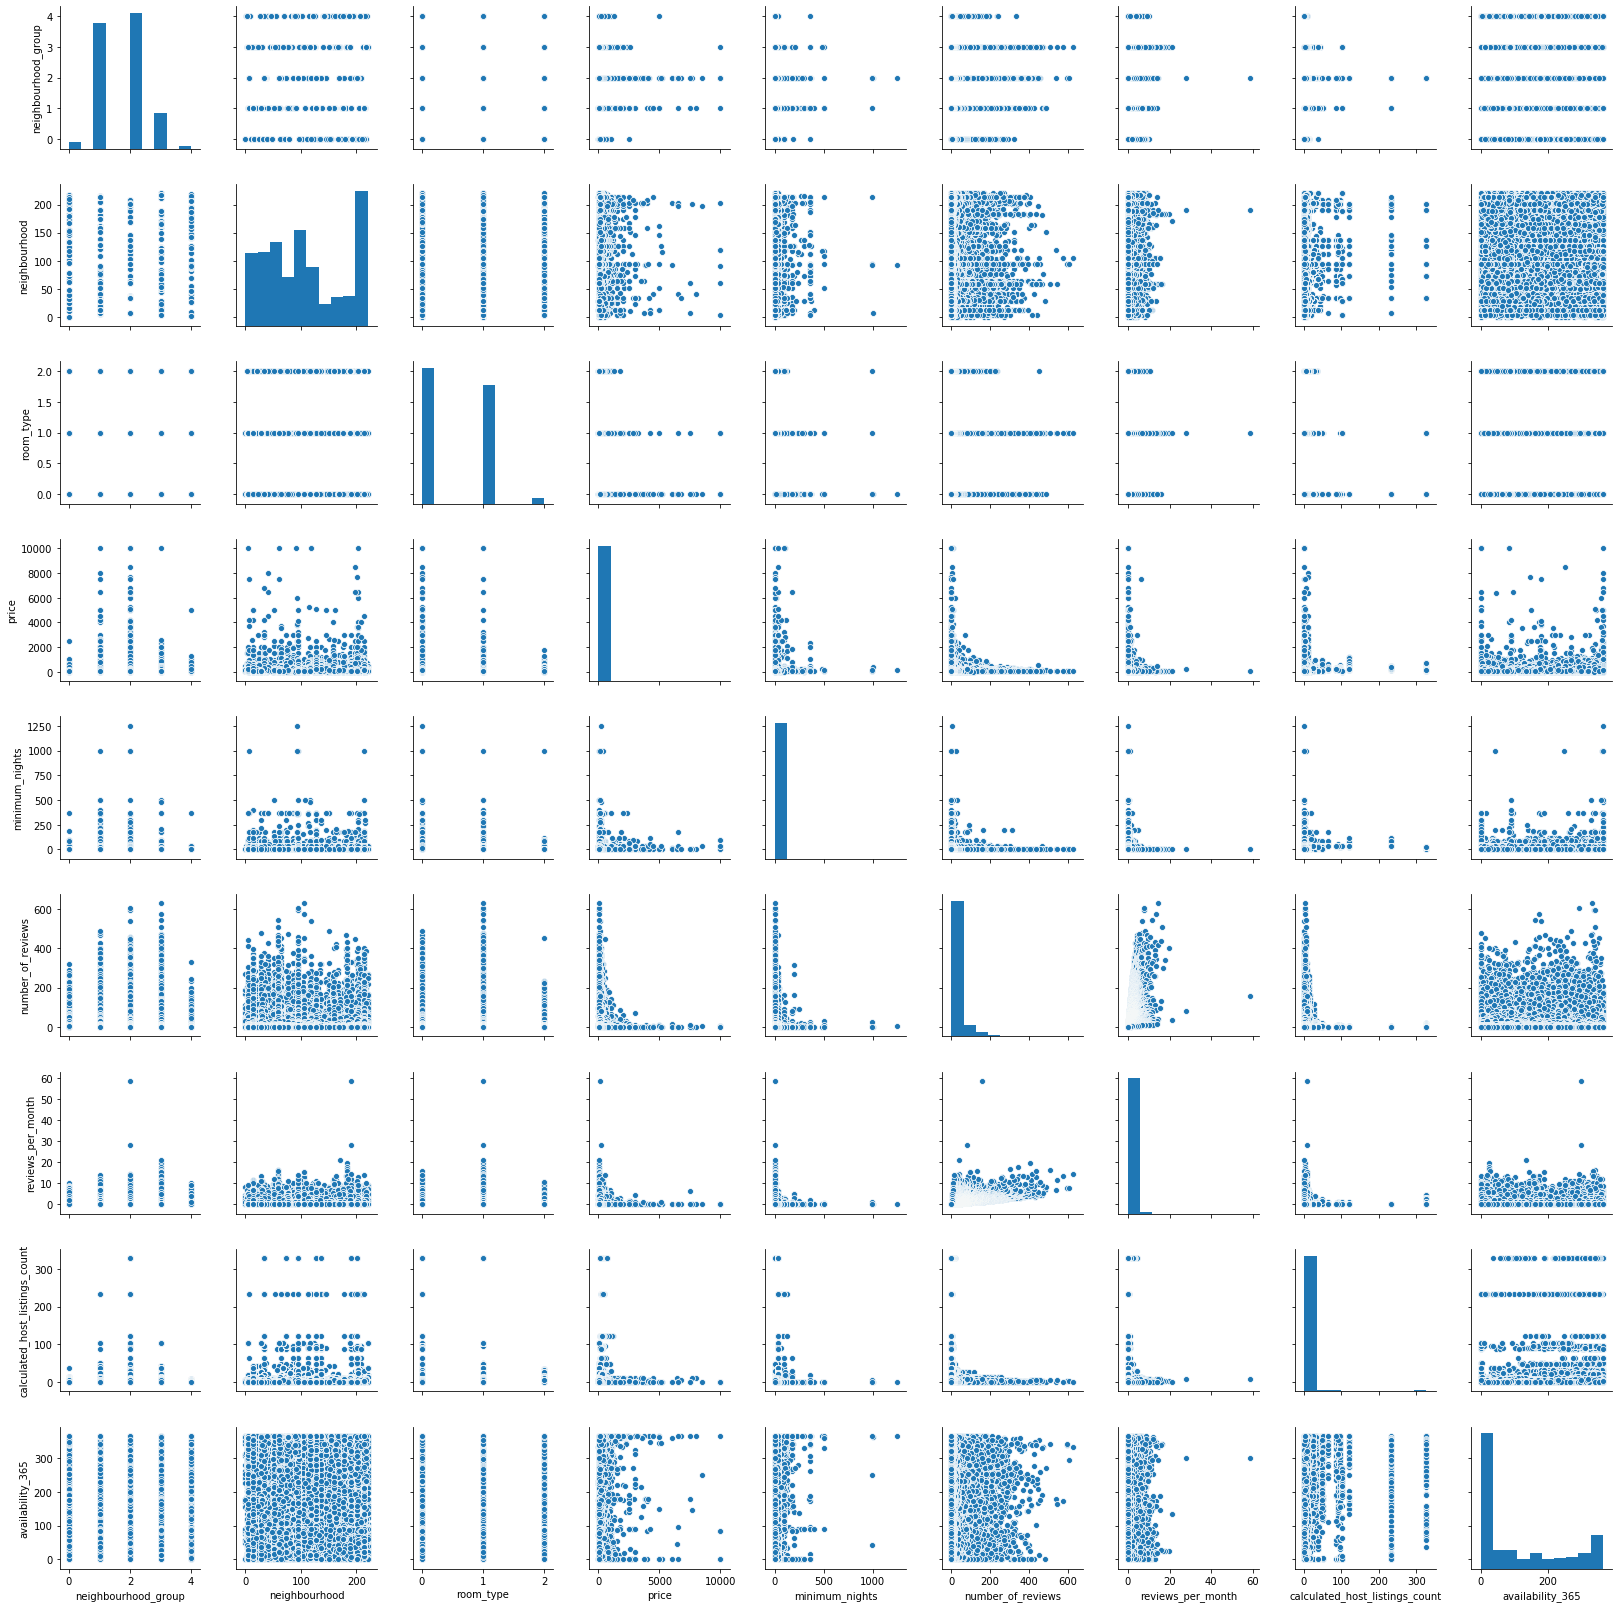

In [80]:
#Generating Seaborn pairplot to find indicators of either classification or useful regression.
#Determined goal: determine price based on neighborhood, room_type, number_of_reviews, and availability_365.
#Most of our columns are not "greater = better" so we will use a qualifier to place the price into "buckets"

sns.pairplot(df, vars = ['neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])

Text(0, 0.5, 'Number of listings')

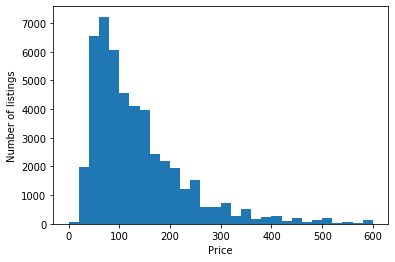

In [161]:
#Using histogram to determine price buckets into which we will classify our input

fig,axs = plt.subplots()
axs.hist(df['price'], 30, range = (0,600))
plt.xlabel('Price')
plt.ylabel('Number of listings')
#Using this data we can see that the data is heavily skewed towards about $100
#Now we will convert the price to a string which will be our target.


Text(0, 0.5, 'Number of listings')

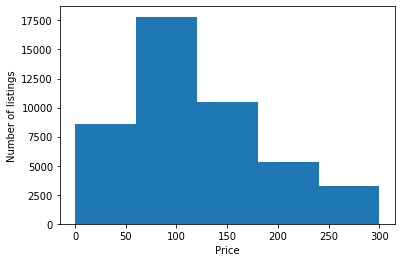

In [162]:
#This histogram shows us much more clearly what bins we may use
#Let's say 1 = [0,75), 2 = [75,125), 3 = [125,225), 4 = [225, 400), 5 = [400, inf)
fig,axs = plt.subplots()
axs.hist(df['price'], 5, range = (0,300))
plt.xlabel('Price')
plt.ylabel('Number of listings')

In [163]:
#Encode price column of our dataframe using rules above
for i in range(len(df.index)):
        
    if df.loc[i,'price'] < 75:
        df.loc[i,'price'] = 1
    elif df.loc[i,'price'] < 125:
        df.loc[i,'price'] = 2
    elif df.loc[i,'price'] < 225:
        df.loc[i,'price'] = 3
    elif df.loc[i,'price'] < 400:
        df.loc[i,'price'] = 4
    else:
        df.loc[i,'price'] = 5


In [164]:
df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,3,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,4,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,3,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,2,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,2,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,137,40.74767,-73.97500,0,3,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,1,13,40.68688,-73.95596,1,1,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,2,95,40.76489,-73.98493,1,2,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,2,202,40.80178,-73.96723,1,2,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,2,35,40.71344,-73.99037,0,3,1,160,2019-06-09,1.33,4,188


Text(0, 0.5, 'Number of listings')

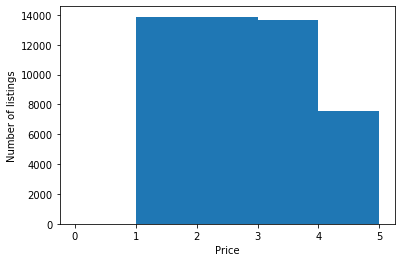

In [165]:
#As you can see we now have evenly distributed bins to classify inputs into
fig,axs = plt.subplots()
axs.hist(df['price'], 5, range = (0,5))
plt.xlabel('Price')
plt.ylabel('Number of listings')

In [189]:
#Classification training models: NaiveBayes and Neural Net
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cls1 = MLPClassifier(solver = 'adam')

In [190]:
X = df[['neighbourhood', 'room_type', 'number_of_reviews']]  #,'reviews_per_month', 'availability_365']]
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2) 


In [191]:
cls1.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [192]:
#prediction and accuracy score
from sklearn import metrics
y_pred = cls1.predict(X_test)
Score = metrics.accuracy_score(y_test,y_pred)

In [193]:
print(Score)

0.45393189487677676


In [194]:
from sklearn.naive_bayes import GaussianNB
cls2 = GaussianNB()
cls2.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [195]:
y_pred_2 = cls2.predict(X_test)
Score = metrics.accuracy_score(y_test,y_pred_2)

In [196]:
print(Score)

0.4920748542795787
